# Data Visualzation
Matplotlib and Seaborn

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Matplotlib

## Loading Dataset
Telco Customer Churn, popular dataset

In [2]:
from sklearn.datasets import fetch_openml
churn_data = fetch_openml(name="Telco-Customer-Churn", version=1, as_frame=True)
df = churn_data.frame

### Initial Examination

In [7]:
df.shape

(7043, 20)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [11]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [12]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [13]:
num_df = df[numeric_cols]
num_df.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


## Histograms

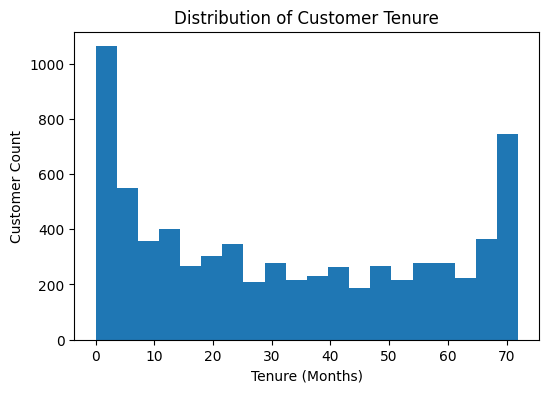

In [14]:
plt.figure(figsize=(6,4))
plt.hist(df['tenure'], bins=20)
plt.xlabel("Tenure (Months)")
plt.ylabel("Customer Count")
plt.title("Distribution of Customer Tenure")
plt.show()

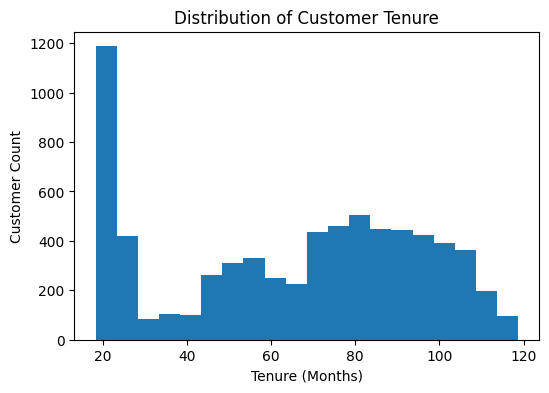

In [15]:
plt.figure(figsize=(6,4))
plt.hist(df['MonthlyCharges'], bins=20)
plt.xlabel("Tenure (Months)")
plt.ylabel("Customer Count")
plt.title("Distribution of Customer Tenure")
plt.show()

## Boxplot

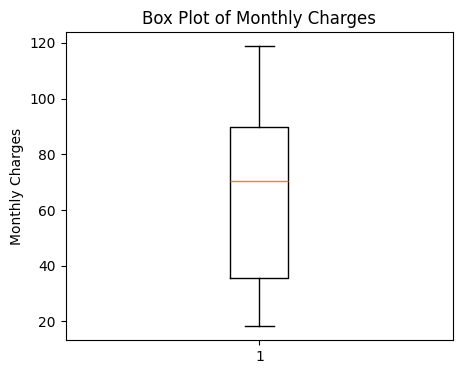

In [16]:
plt.figure(figsize=(5,4))
plt.boxplot(df['MonthlyCharges'])
plt.ylabel("Monthly Charges")
plt.title("Box Plot of Monthly Charges")
plt.show()

In [ ]:
plt.figure(figsize=(5,4))
plt.boxplot(df['TotalCharges'].dropna())
plt.ylabel("Total Charges")
plt.title("Box Plot of Total Charges")
plt.show()

In [18]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

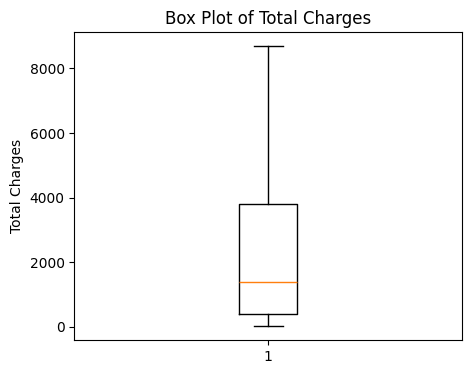

In [19]:
plt.figure(figsize=(5,4))
plt.boxplot(df['TotalCharges'].dropna())
plt.ylabel("Total Charges")
plt.title("Box Plot of Total Charges")
plt.show()

## Scatter Plots
for Feature relationship

Tenure vs Monthly Charge

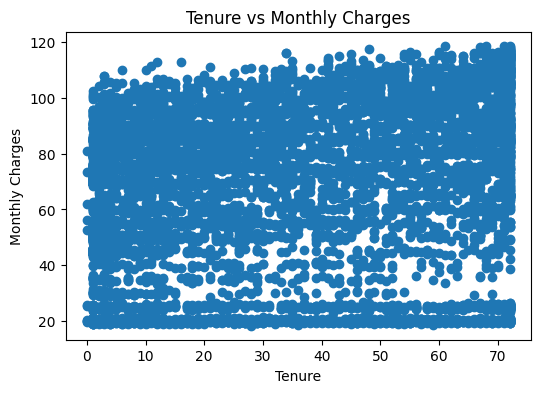

In [20]:
plt.figure(figsize=(6,4))
plt.scatter(df['tenure'], df['MonthlyCharges'])
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
plt.title("Tenure vs Monthly Charges")
plt.show()

total charges

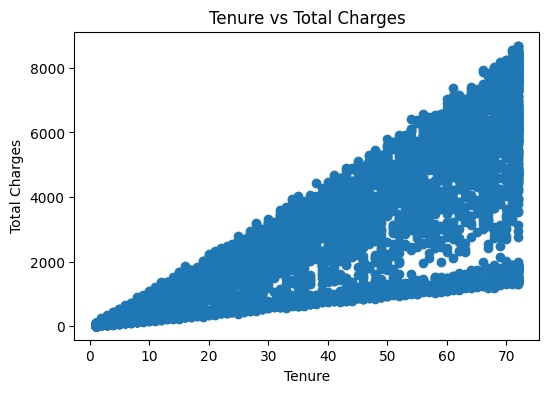

In [22]:
plt.figure(figsize=(6,4))
plt.scatter(df['tenure'], df['TotalCharges'])
plt.xlabel("Tenure")
plt.ylabel("Total Charges")
plt.title("Tenure vs Total Charges")
plt.show()

## Bar Graphs

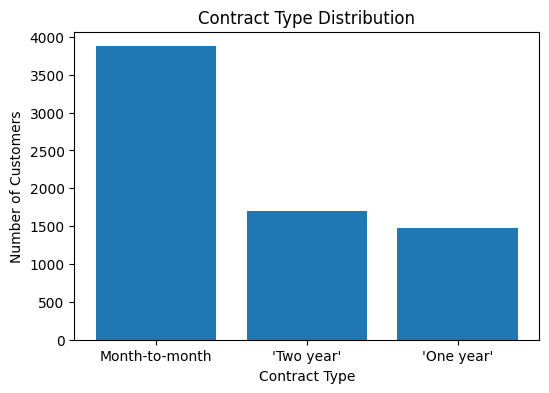

In [23]:
contract_counts = df['Contract'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(contract_counts.index, contract_counts.values)
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.title("Contract Type Distribution")
plt.show()

Churn Classes

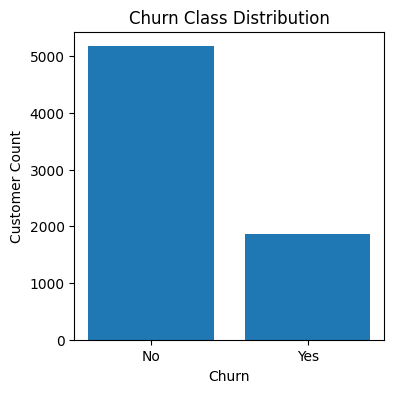

In [25]:
churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(4,4))
plt.bar(churn_counts.index, churn_counts.values)
plt.xlabel("Churn")
plt.ylabel("Customer Count")
plt.title("Churn Class Distribution")
plt.show()

# Seaborn

In [26]:
import seaborn as sns

## Distribution Plotting

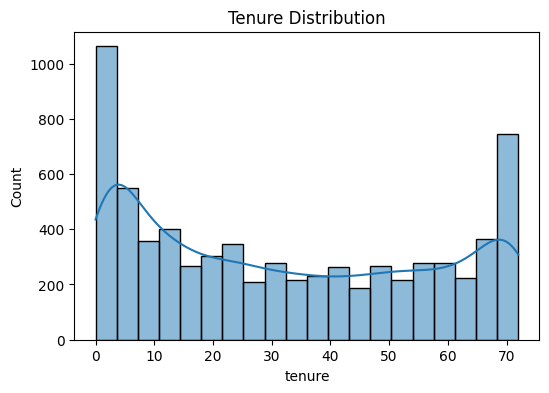

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(df['tenure'], bins=20, kde=True)
plt.title("Tenure Distribution")
plt.show()

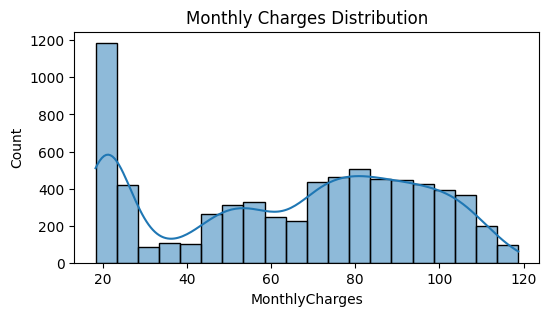

In [32]:
plt.figure(figsize=(6,3))
sns.histplot(df['MonthlyCharges'], bins=20, kde=True)
plt.title("Monthly Charges Distribution")
plt.show()

## Boxplot

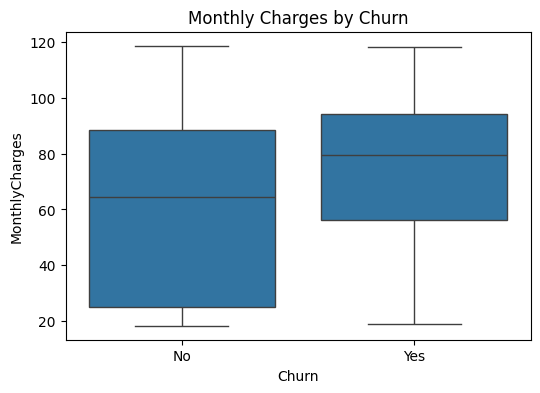

In [33]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Churn")
plt.show()

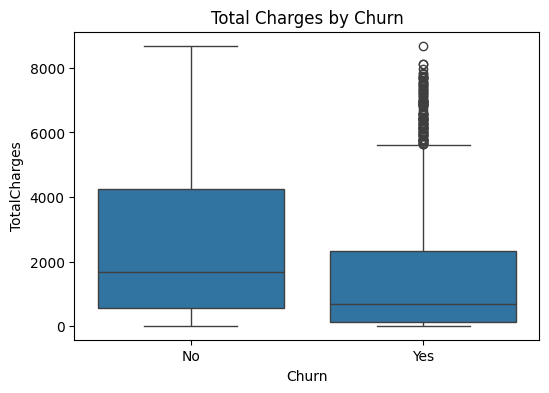

## Feature Relation

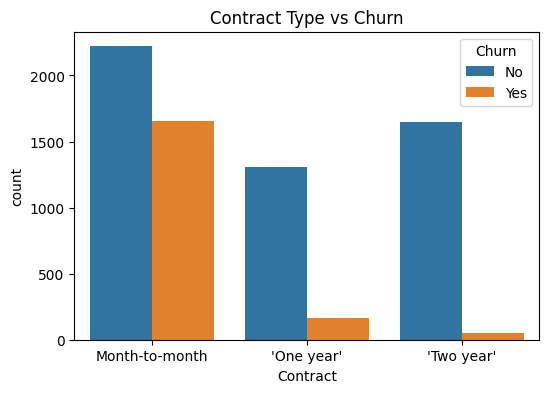

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract Type vs Churn")
plt.show()

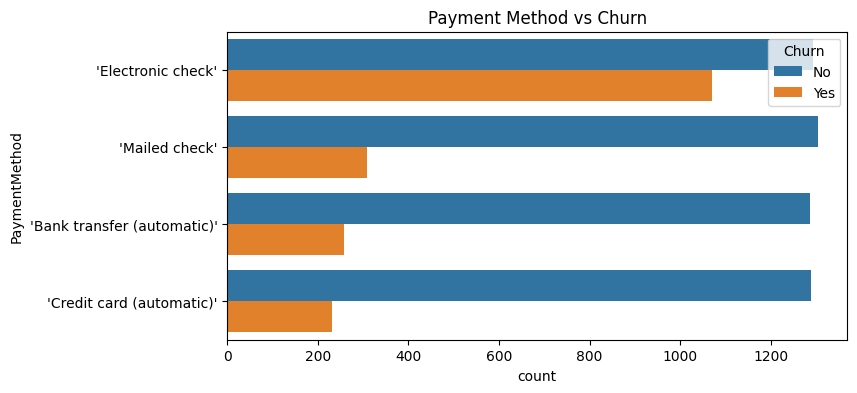

In [36]:
plt.figure(figsize=(8,4))
sns.countplot(y='PaymentMethod', hue='Churn', data=df)
plt.title("Payment Method vs Churn")
plt.show()

## Scatter Plot

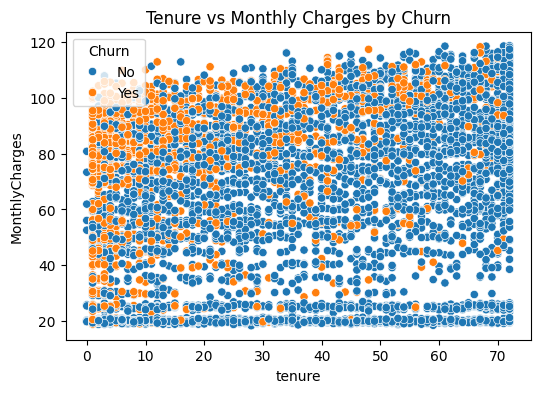

In [37]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title("Tenure vs Monthly Charges by Churn")
plt.show()

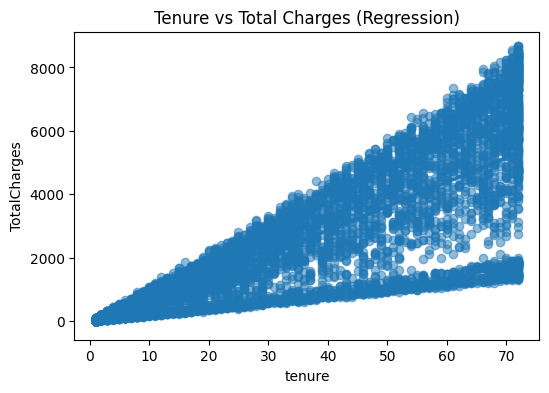

In [38]:
plt.figure(figsize=(6,4))
sns.regplot(x='tenure', y='TotalCharges', data=df, scatter_kws={'alpha':0.5})
plt.title("Tenure vs Total Charges (Regression)")
plt.show()

# Missing Value Heatmap

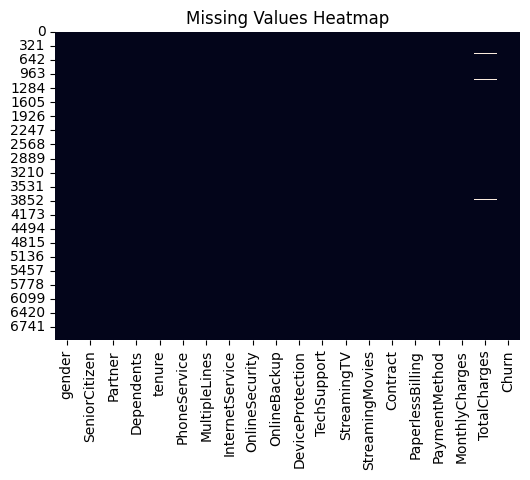

In [39]:
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()